<nav>
<a href=”https://www.google.com">LinkedIn</a> |
<a href=”/css/”>Github</a> |
<a href=”/js/”>Medium</a> |
</nav>

# Project: Wrangling and Analyze Data

<div class="alert alert-success" markdown="1">

 ### Author : **Ouedraogo Ami Samyra**  
 #### Dog Data analyste
<img src="https://d34zrgnx1tq8w.cloudfront.net/564277/uploads/4cd4a820-9f83-11ec-b6a3-4bf447759056_1200_630.png">

</div>

## Data Gathering

##### Import libraries

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import requests
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
import squarify                 # generate treemap

##### load csv data

In [3]:
twitter=pd.read_csv("data/twitter-archive-enhanced.csv")


#### load tsv data with resquest and store it in my current file

In [4]:
images=requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("images_predictions.tsv",mode="wb") as file:
    file.write(images.content)
    
    


#### load tsv file from my directory

In [5]:
im_predict=pd.read_csv("data/images_predictions.tsv",delimiter="\t") 
im_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### read every line of the file to a string

In [6]:
with open(r'C:/Users/ouedr/project2/data/tweet-json.txt', encoding='utf-8') as f:
    lines = f.readlines()
    

#### convert each line to a json object and store them in a dictionnary

In [7]:
data = []
for line in lines:
    data.append(json.loads(line))

data[0]   

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

#### convert my dictionnary into a dataframe

In [8]:
df = pd.DataFrame(data)

tweet=df[['id','retweet_count','favorite_count']]
tweet=tweet.rename(columns={'id':'tweet_id'})
tweet.tail()

    
    

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


## Assessing Data

#### lets checks check if we have to deals with tidy or /and dirty data

In [9]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [11]:
im_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
for col in twitter.select_dtypes('object'):
    print(f'{col :-<50}\n {twitter[col].unique()}\n')

timestamp-----------------------------------------
 ['2017-08-01 16:23:56 +0000' '2017-08-01 00:17:27 +0000'
 '2017-07-31 00:18:03 +0000' ... '2015-11-15 23:21:54 +0000'
 '2015-11-15 23:05:30 +0000' '2015-11-15 22:32:08 +0000']

source--------------------------------------------
 ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

text----------------------------------------------
 ["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall g

In [13]:

for col in tweet.select_dtypes('object'):
    print(f'{col :-<50}\n {tweet[col].unique()}\n')

In [14]:
for col in im_predict.select_dtypes('object'):
    print(f'{col :-<50}\n {im_predict[col].unique()}\n')
    

jpg_url-------------------------------------------
 ['https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'
 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg'
 'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg' ...
 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg'
 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg'
 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg']

p1------------------------------------------------
 ['Welsh_springer_spaniel' 'redbone' 'German_shepherd'
 'Rhodesian_ridgeback' 'miniature_pinscher' 'Bernese_mountain_dog'
 'box_turtle' 'chow' 'shopping_cart' 'miniature_poodle' 'golden_retriever'
 'Gordon_setter' 'Walker_hound' 'pug' 'bloodhound' 'Lhasa'
 'English_setter' 'hen' 'desktop_computer' 'Italian_greyhound'
 'Maltese_dog' 'three-toed_sloth' 'ox' 'malamute' 'guinea_pig'
 'soft-coated_wheaten_terrier' 'Chihuahua' 'black-and-tan_coonhound'
 'coho' 'toy_terrier' 'Blenheim_spaniel' 'Pembroke' 'llama'
 'Chesapeake_Bay_retriever' 'curly-coated_retriever' 'dalmatian'
 'Ibizan_

In [15]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [17]:
im_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
twitter.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Lilah         1
Marty         1
Harrison      1
Boston        1
Samsom        1
Name: name, Length: 957, dtype: int64

In [19]:
twitter.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [20]:
twitter.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [21]:
im_predict.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
zebra                   1
long-horned_beetle      1
quilt                   1
hummingbird             1
pencil_box              1
Name: p1, Length: 378, dtype: int64

In [22]:
twitter.duplicated().sum()

0

In [23]:
tweet.duplicated().sum()

0

In [24]:
im_predict.duplicated().sum()

0

<AxesSubplot:>

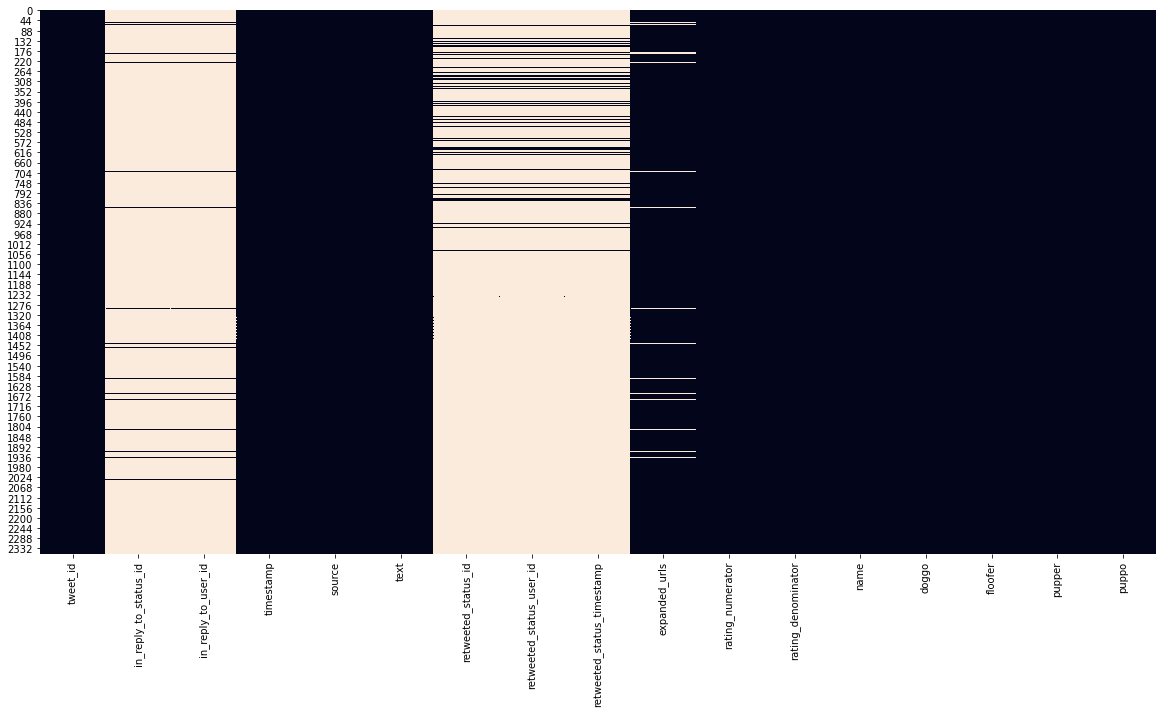

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(twitter.isna(), cbar=False)

#### lets check if each image have been predicted

In [26]:
im_predict.query('p1_dog==False & p2_dog == False & p3_dog == False|p1_dog==True & p2_dog == True & p3_dog == True')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [27]:
im_predict.query('p1_conf==False & p2_dog == False & p3_dog == False|p1_dog==True & p2_dog == True & p3_dog == True')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [28]:
#Creating Function for Barh Plot
def Barplot(data_name,plot_title,x_label,y_label):
    data_name.plot(kind = 'barh',figsize = (10,6))
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

## Assessing Data


### Quality issues    
##### Twitter archive  table 
<li>we can se that we have some missing data(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp,expanded_urls)</li>
<li> some dogs have as name 'a' which is an error due to name extraction</li>
<li> timestamp,retweeted_status_timestamp should be a datetime type</li>
<li> some rating_denominator are greater than 10 exemple 180 or 50</li>
<li>source : source url still contains some html tag to remove</li>
<li>some rating denominator,rating numerator are equals to zero</li>
<li>some rating note have been extract incorrectly and some are not even dog rating</li>

#### images_predictions
<li>some dogs have not been classified </li>
<li>some dogs have more than one classification</li>
<li>name of image prediction table's columns  are not revelant</li>
    



### tidyness issues
#### Twitter archive  table
<li> tweets informations and retweet information should be separate</li>
<li> columns doggo,floofer,pupper,puppo should be one columns</li>
<li> the 3 dataset should be merge together</li>

In [29]:
df_twitter=twitter.copy()
df_tweet=tweet.copy()
df_predict=im_predict.copy()

### Data Cleaning

#### data quality

>#### define
convert timestamp,retweeted_status_timestamp by using to_datetime()

#### code

In [30]:
df_twitter[['timestamp','retweeted_status_timestamp']]=df_twitter[['timestamp','retweeted_status_timestamp']].apply(lambda x: pd.to_datetime(x))

#### test

In [31]:
df_twitter[['timestamp','retweeted_status_timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   timestamp                   2356 non-null   datetime64[ns, UTC]
 1   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 36.9 KB


>#### define
source url still contains some html tag to remove with pandas replace function

#### code

In [32]:

df_twitter.source=df_twitter.source.str.replace(r'<[^<>]*>', '', regex=True)

#### test

In [33]:
df_twitter.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: object

>#### define
some dogs have as name 'a' which is an error due to name extraction ,i first will try to find the right name and for those that i can find i'll remplace them by None

#### code

In [34]:
name_to_extraxt=df_twitter[df_twitter["name"]=="a"]
name_to_extraxt.to_csv("data/name_to_extraxt.csv")

In [35]:
name_extract=pd.read_csv("data/name_extraxt.csv")
name_extract.set_index('index',inplace=True)
name_extract.loc[2066]["name"]

'Rufus'

In [36]:
for ind in name_extract.index: 
    df_twitter.loc[ind,"name"]=name_extract.loc[ind]["name"]

In [37]:
df_twitter.loc[df_twitter[df_twitter["name"]=="a"].index,"name"]="None"

#### test

In [38]:
df_twitter.name.value_counts()

None       784
Charlie     12
Lucy        11
Cooper      11
Oliver      11
          ... 
Carll        1
Carter       1
Jiminus      1
Ralphy       1
Samsom       1
Name: name, Length: 971, dtype: int64

>#### define  
#some rating denominator,rating numerator are equals to zero

In [39]:
#code

In [40]:
df_twitter.drop(df_twitter[(df_twitter["rating_numerator"]==0) | (df_twitter["rating_denominator"]==0)].index,inplace=True)


In [41]:
#test

In [42]:
df_twitter[(df_twitter["rating_numerator"]==0) | (df_twitter["rating_denominator"]==0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


>#### define
some rating_denominator are greater than 10 exemple 180 or 50

#### code

In [43]:

df_twitter["dog_rate"]=df_twitter["rating_numerator"]/df_twitter["rating_denominator"]

### test

In [44]:
df_twitter["dog_rate"]

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: dog_rate, Length: 2353, dtype: float64

#### tidyness

>#### define
tweets informations and retweet information should be separate 

#### code

In [45]:
df_retweet=df_twitter[['tweet_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp']]
df_reply=df_twitter[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id','timestamp']]
df_twitter=df_twitter[["tweet_id",'timestamp', 'expanded_urls', 'rating_numerator','rating_denominator', 'name','dog_rate','doggo','floofer','pupper','puppo']]

In [46]:
df_twitter.tweet_id.drop_duplicates(inplace=True)

#### test

In [47]:
df_twitter.sample(10)

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_rate,doggo,floofer,pupper,puppo
2124,670374371102445568,2015-11-27 22:51:19+00:00,https://twitter.com/dog_rates/status/670374371...,12,10,Daisy,1.2,None,None,None,None
41,884441805382717440,2017-07-10 15:58:53+00:00,https://twitter.com/dog_rates/status/884441805...,14,10,None,1.4,None,None,None,None
1116,732585889486888962,2016-05-17 14:57:41+00:00,https://twitter.com/dog_rates/status/732585889...,10,10,None,1.0,None,None,None,None
1800,676975532580409345,2015-12-16 04:01:59+00:00,https://twitter.com/dog_rates/status/676975532...,11,10,Cooper,1.1,None,None,None,None
439,819952236453363712,2017-01-13 17:00:21+00:00,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,1.3,None,None,None,puppo
865,762316489655476224,2016-08-07 15:56:28+00:00,https://twitter.com/dog_rates/status/762316489...,11,10,Scout,1.1,None,None,None,None
1249,711306686208872448,2016-03-19 21:41:44+00:00,https://twitter.com/dog_rates/status/711306686...,3,10,None,0.3,None,None,None,None
1304,707411934438625280,2016-03-09 03:45:22+00:00,https://twitter.com/dog_rates/status/707411934...,11,10,None,1.1,None,None,pupper,None
843,766714921925144576,2016-08-19 19:14:16+00:00,NaN,13,10,None,1.3,None,None,None,None
1378,701570477911896070,2016-02-22 00:53:31+00:00,https://twitter.com/dog_rates/status/701570477...,9,10,Yoda,0.9,None,None,None,None


> #### define
columns doggo,floofer,pupper,puppo should be one columns by using pandas melt function

#### code

In [48]:
df_twitter.columns

Index(['tweet_id', 'timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_rate', 'doggo', 'floofer', 'pupper',
       'puppo'],
      dtype='object')

In [49]:

df_twitter = pd.melt(df_twitter, id_vars=['tweet_id','timestamp','expanded_urls', 'rating_numerator','rating_denominator', 'name','dog_rate' ],var_name='status', value_name='doggolingo_term')

In [50]:
df_twitter.drop(columns={"status"},inplace=True)

#### test

In [51]:
df_twitter[df_twitter["doggolingo_term"]!="None"]

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_rate,doggolingo_term
9,890240255349198849,2017-07-26 15:59:51+00:00,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1.4,doggo
43,884162670584377345,2017-07-09 21:29:42+00:00,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,1.2,doggo
99,872967104147763200,2017-06-09 00:02:31+00:00,https://twitter.com/dog_rates/status/872967104...,12,10,None,1.2,doggo
108,871515927908634625,2017-06-04 23:56:03+00:00,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,1.2,doggo
110,871102520638267392,2017-06-03 20:33:19+00:00,https://twitter.com/animalcog/status/871075758...,14,10,None,1.4,doggo
...,...,...,...,...,...,...,...,...
8004,752519690950500352,2016-07-11 15:07:30+00:00,https://twitter.com/dog_rates/status/752519690...,11,10,None,1.1,puppo
8018,751132876104687617,2016-07-07 19:16:47+00:00,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,1.0,puppo
8091,744995568523612160,2016-06-20 20:49:19+00:00,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,0.9,puppo
8104,743253157753532416,2016-06-16 01:25:36+00:00,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,1.0,puppo


In [52]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            9412 non-null   int64              
 1   timestamp           9412 non-null   datetime64[ns, UTC]
 2   expanded_urls       9180 non-null   object             
 3   rating_numerator    9412 non-null   int64              
 4   rating_denominator  9412 non-null   int64              
 5   name                9412 non-null   object             
 6   dog_rate            9412 non-null   float64            
 7   doggolingo_term     9412 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(3)
memory usage: 588.4+ KB


> #### Define
the 3 dataset should be merge together

#### Code

In [53]:
df_final=pd.merge(pd.merge(df_twitter,tweet,on='tweet_id',how="inner"),im_predict,on='tweet_id',how="outer")

#### test

In [54]:
df_final.isna().sum()

tweet_id                 0
timestamp                4
expanded_urls          236
rating_numerator         4
rating_denominator       4
name                     4
dog_rate                 4
doggolingo_term          4
retweet_count            4
favorite_count           4
jpg_url               1120
img_num               1120
p1                    1120
p1_conf               1120
p1_dog                1120
p2                    1120
p2_conf               1120
p2_dog                1120
p3                    1120
p3_conf               1120
p3_dog                1120
dtype: int64

In [55]:
df_final.sample(10)

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_rate,doggolingo_term,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6369,686050296934563840,2016-01-10 05:01:51+00:00,https://twitter.com/dog_rates/status/686050296...,11.0,10.0,Flávio,1.1,None,836.0,2420.0,...,1.0,Pomeranian,0.985789,True,keeshond,0.004083,True,Pekinese,0.003334,True
596,863062471531167744,2017-05-12 16:05:02+00:00,"https://www.gofundme.com/helpquinny,https://tw...",13.0,10.0,Quinn,1.3,None,2687.0,8945.0,...,2.0,French_bulldog,0.935804,True,pug,0.059576,True,boxer,0.001412,True
3937,748977405889503236,2016-07-01 20:31:43+00:00,https://twitter.com/dog_rates/status/748977405...,10.0,10.0,not,1.0,None,3759.0,11235.0,...,1.0,German_short-haired_pointer,0.742216,True,bluetick,0.152810,True,English_setter,0.051835,True
4519,728653952833728512,2016-05-06 18:33:34+00:00,https://twitter.com/dog_rates/status/728653952...,8.0,10.0,Coleman,0.8,None,1169.0,3620.0,...,2.0,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False
6651,682662431982772225,2015-12-31 20:39:41+00:00,https://twitter.com/dog_rates/status/682662431...,11.0,10.0,Joey,1.1,None,1207.0,3326.0,...,1.0,beagle,0.413824,True,Cardigan,0.263553,True,basset,0.167618,True
6280,687476254459715584,2016-01-14 03:28:06+00:00,https://twitter.com/dog_rates/status/687476254...,11.0,10.0,Curtis,1.1,None,619.0,2187.0,...,1.0,wood_rabbit,0.702725,False,Angora,0.190659,False,hare,0.105072,False
4067,746726898085036033,2016-06-25 15:29:00+00:00,https://twitter.com/dog_rates/status/746726898...,12.0,10.0,Abby,1.2,None,2037.0,6648.0,...,1.0,golden_retriever,0.256505,True,Labrador_retriever,0.252417,True,seat_belt,0.203163,False
5337,704871453724954624,2016-03-02 03:30:25+00:00,https://twitter.com/dog_rates/status/704871453...,12.0,10.0,None,1.2,None,1245.0,4585.0,...,1.0,Norfolk_terrier,0.689504,True,soft-coated_wheaten_terrier,0.101480,True,Norwich_terrier,0.055778,True
8469,670403879788544000,2015-11-28 00:48:35+00:00,https://twitter.com/dog_rates/status/670403879...,10.0,10.0,Nigel,1.0,None,173.0,460.0,...,1.0,pug,0.802223,True,French_bulldog,0.172557,True,bull_mastiff,0.007163,True
7424,675483430902214656,2015-12-12 01:12:54+00:00,https://twitter.com/dog_rates/status/675483430...,5.0,10.0,None,0.5,None,1081.0,1985.0,...,1.0,box_turtle,0.543706,False,terrapin,0.202600,False,loggerhead,0.071122,False


## Storing Data

In [56]:
df_final.to_csv("data/twitter_archive_master.csv")

## Analyzing and Visualizing Data

### Insights:

<li>1-top 10 of posted name on weratedogs</li>
<li>2-top 10 of underrated dog</li>
<li>3-which post about dogs have been the most retweet?</li>
<li>5-top 10 favorites dog base on favorite_count</li>

### Visualization

#### 1-top 10 of posted name on weratedogs

In [57]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            9412 non-null   int64              
 1   timestamp           9412 non-null   datetime64[ns, UTC]
 2   expanded_urls       9180 non-null   object             
 3   rating_numerator    9412 non-null   int64              
 4   rating_denominator  9412 non-null   int64              
 5   name                9412 non-null   object             
 6   dog_rate            9412 non-null   float64            
 7   doggolingo_term     9412 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(3)
memory usage: 588.4+ KB


In [58]:
top_10_dog_name=df_final.name.value_counts()
top_10_dog_name=top_10_dog_name[1:10].sort_values(ascending=False)
top_10_dog_name

Charlie    48
Oliver     44
Lucy       44
Cooper     44
Penny      40
Tucker     40
Lola       40
Bo         36
Winston    36
Name: name, dtype: int64

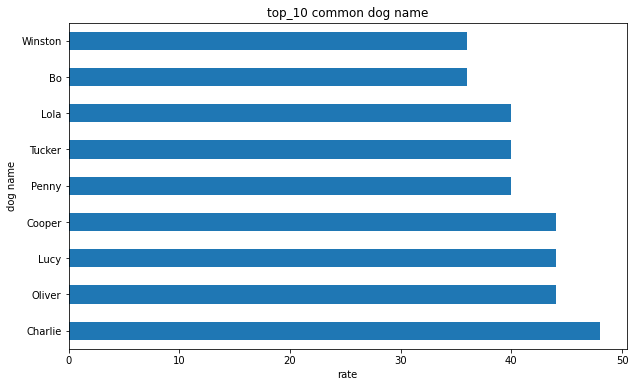

In [59]:
Barplot(top_10_dog_name,'top_10 common dog name','rate','dog name')


In [60]:
#### Conclusion

les 10 noms de chien les plus posté sont
- Charlie  
- Oliver     
- Lucy       
- Cooper     
- Penny      
- Lola       
- Tucker     
- Winston    
- Bo         

#### 2-top 10 of underrated dog

In [61]:
top_10_underrated_dog=df_twitter.groupby(["name"]).mean().sort_values(by="dog_rate",ascending=True)
top_10_underrated_dog=top_10_underrated_dog[:10]['dog_rate']
top_10_underrated_dog

name
Tedrick         0.2
Henry           0.2
Charl           0.3
Chuck           0.3
Alexanderson    0.3
Wesley          0.3
Tommy           0.3
Bobby           0.4
Fido            0.4
Zeek            0.5
Name: dog_rate, dtype: float64

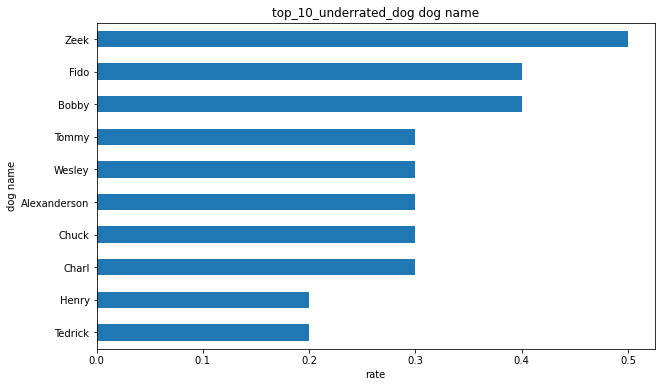

In [62]:
Barplot(top_10_underrated_dog,'top_10_underrated_dog dog name','rate','dog name')


In [63]:
#### Conclusion

la liste des noms de chiens les plus underrated
- Tedrick         0.2
- Henry           0.2
- Charl           0.3
- Chuck           0.3
- Alexanderson    0.3
- Wesley          0.3
- Tommy           0.3
- Bobby           0.4
- Fido            0.4
- Zeek            0.5

#### 3-which post about dogs have been the most retweet?

In [64]:
most_retweet=df_final.groupby('doggolingo_term').sum().sort_values(by="favorite_count",ascending=False)
most_retweet.reset_index(inplace=True)

In [65]:
most_retweet=most_retweet[1:5]
most_retweet

,doggolingo_term,tweet_id,rating_numerator,rating_denominator,dog_rate,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
1,pupper,1.865028e+20,2782.0,2560.0,278.2,763443.0,1728255.0,275.0,135.917469,28.401820,12.279473
2,doggo,7.712371e+19,1145.0,970.0,114.5,707663.0,1488466.0,102.0,48.955193,11.825498,4.588381
3,puppo,2.428836e+19,364.0,300.0,36.4,197434.0,546777.0,34.0,16.912580,3.341203,1.096538
4,floofer,7.656406e+18,118.0,100.0,11.8,40836.0,116749.0,9.0,4.619160,1.264771,0.467682


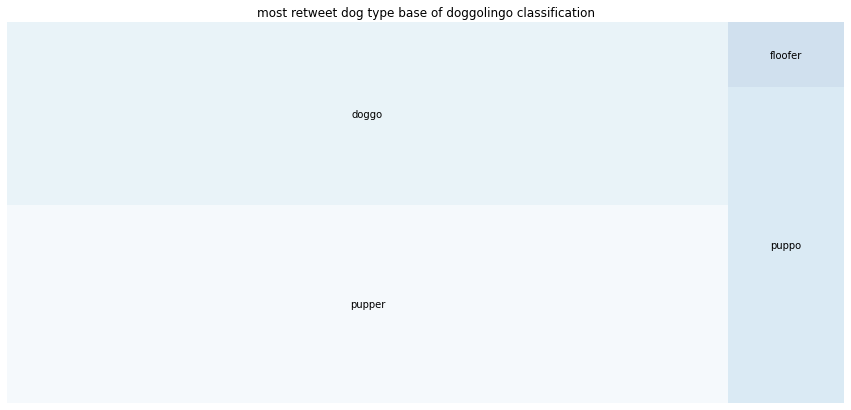

In [75]:

plt.figure(figsize=(15,7));
squarify.plot(most_retweet['retweet_count'], label=most_retweet.doggolingo_term,color=sns.color_palette("Blues", 
                                     len(most_retweet)),alpha=0.2);
plt.title("most retweet dog type base of doggolingo classification") ; 
plt.axis('off');
plt.show();

#### Conclusion

les types de chiens conformement a la classification doggolingo les plus retwetter sont par ordre decroissant
les pupper ,les doggo ,les puppo et les floofler

#### 4-top 10 favorites dog base on favorite_count

In [67]:
to_10_favorite_dog=df_final.groupby('name').sum().sort_values(by="favorite_count",ascending=False)
to_10_favorite_dog=to_10_favorite_dog[:11]
to_10_favorite_dog=to_10_favorite_dog[1:10]
to_10_favorite_dog.reset_index(inplace=True)
to_10_favorite_dog

,name,tweet_id,rating_numerator,rating_denominator,dog_rate,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
0,Bo,2.804855e+19,436.0,360.0,43.6,498244.0,743688.0,36.0,19.392388,4.025994,1.647773
1,Charlie,3.723180e+19,556.0,480.0,55.6,138008.0,461872.0,60.0,23.714708,5.657465,2.706823
2,Zoey,9.723905e+18,140.0,120.0,14.0,128804.0,454324.0,12.0,6.019580,1.559278,0.949228
3,Lucy,3.279504e+19,488.0,440.0,48.8,144232.0,449856.0,40.0,25.891932,4.952017,2.215876
4,Duddles,3.517663e+18,52.0,40.0,5.2,183396.0,431824.0,4.0,1.533616,0.539868,0.441924
5,quite,1.300423e+19,152.0,160.0,15.2,242592.0,429236.0,16.0,4.073484,2.703472,1.603825
6,Stephan,6.599996e+18,104.0,80.0,10.4,453000.0,428060.0,8.0,4.042960,0.962864,0.616065
7,Jamesy,6.933068e+18,104.0,80.0,10.4,263064.0,427308.0,8.0,3.621336,0.312239,0.007084
8,Penny,3.037950e+19,424.0,400.0,42.4,151888.0,411944.0,44.0,28.693176,6.848347,1.390135


In [68]:
to_10_favorite_dog=to_10_favorite_dog[["name","favorite_count"]]

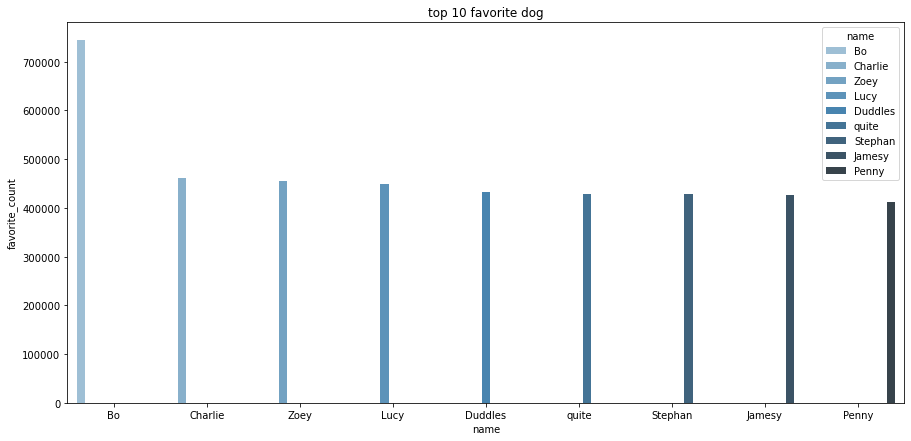

In [74]:
plt.figure(figsize=[15,7])
sns.barplot(x='name', y='favorite_count', hue = 'name',palette="Blues_d", data=to_10_favorite_dog);
plt.title("top 10 favorite dog");

#### Conclusion

les top 10 des chiens ayant eté choisi comme favoris sur weRateDogs sont Bo,Charlie ,zoey ,Lucy ,Duddle,quite,Stephan ,Jamesy an Penny